# Partie 1 - Exploration des données

## Chargement des librairies et lecture du dataset

In [1]:
library(ggmap)
library(ggplot2)

API_key <- readLines("API.txt",n = 1)

register_stadiamaps(key = API_key)

Le chargement a nécessité le package : ggplot2

ℹ Google's Terms of Service: <https://mapsplatform.google.com>
  Stadia Maps' Terms of Service: <https://stadiamaps.com/terms-of-service>
  OpenStreetMap's Tile Usage Policy: <https://operations.osmfoundation.org/policies/tiles>
ℹ Please cite ggmap if you use it! Use `citation("ggmap")` for details.
ℹ Google's Terms of Service: <https://mapsplatform.google.com>
  Stadia Maps' Terms of Service: <https://stadiamaps.com/terms-of-service>
  OpenStreetMap's Tile Usage Policy: <https://operations.osmfoundation.org/policies/tiles>
ℹ Please cite ggmap if you use it! Use `citation("ggmap")` for details.
Warning message in readLines("API.txt", n = 1):
“ligne finale incomplète trouvée dans 'API.txt'”
Warning message in readLines("API.txt", n = 1):
“ligne finale incomplète trouvée dans 'API.txt'”


In [2]:
# Lire les données depuis le csv 
data <- read.csv("donnees-synop-essentielles-omm.csv", sep = ";", header = TRUE)

## Description quantitative des données

In [52]:
cat("Le dataset contient", nrow(data), "lignes (points de mesures) et", ncol(data), "colonnes (paramètres).\n")
cat("Il contient des données météo issues de", length(unique(data$ID.OMM.station)), "stations.\n")

cat("Les données débutent le", min(data$Date), "et se terminent le", max(data$Date), ".\n")

Le dataset contient 1719567 lignes (points de mesures) et 82 colonnes (paramètres).
Il contient des données météo issues de 62 stations.
Il contient des données météo issues de 62 stations.
Les données débutent le 2015-08-04T02:00:00+02:00 et se terminent le 2025-09-03T23:00:00+02:00 .
Les données débutent le 2015-08-04T02:00:00+02:00 et se terminent le 2025-09-03T23:00:00+02:00 .


## Répartition temporelle des données
On regarde l'étendue de nos données et les éventuels trous pour ne pas suranalyser des phénomènes plus tard (ex si on a un hiver de + dans les données, cela fausse nos moyennes de température)

In [66]:
annee <- as.numeric(format(as.Date(data$Date), "%Y"))
mois <- as.numeric(format(as.Date(data$Date), "%m"))

data$Annee <- annee
data$Mois <- mois

Cette représentation montre que les données sont globalement bien réparties sur les mois.


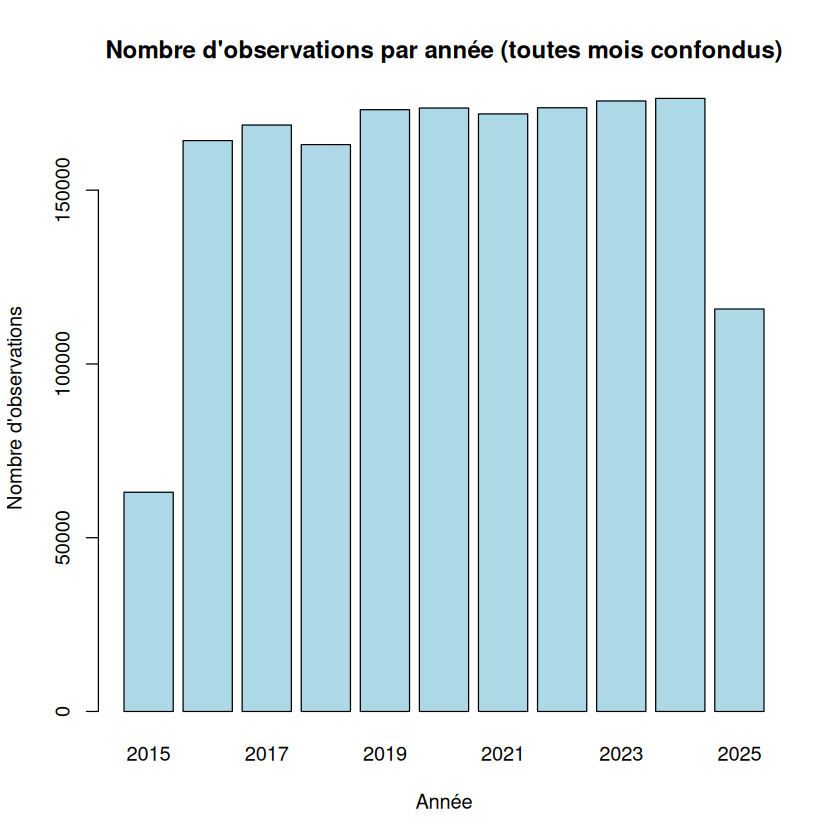

In [74]:
par(bg = "white")
barplot(table(annee),
        main = "Nombre d'observations par année (toutes mois confondus)",
        col = "lightblue",
        xlab = "Année",
        ylab = "Nombre d'observations")

cat("Cette représentation montre que les données sont globalement bien réparties sur les mois.\n")


En 2025 il est normal qu'il manque quelques mois  
En 2016 en revanche le nombre de données est plus faible. On doit vérifier si l'année est complète ou si quelques mois seulement sont représentés



En 2016, les mois représentés sont :  8 9 10 11 12 


En 2025, les mois représentés sont :  1 2 3 4 5 6 7 8 9 


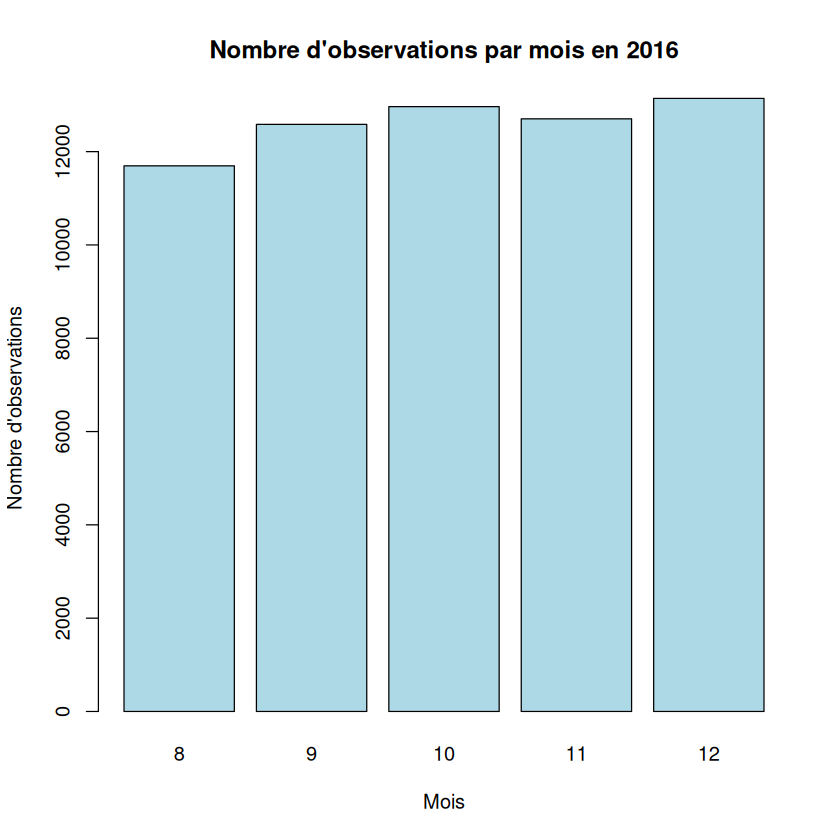

In [81]:
cat("En 2016, les mois représentés sont : ", sort(unique(mois[annee == 2015])), "\n")
cat("En 2025, les mois représentés sont : ", sort(unique(mois[annee == 2025])), "\n")

par(bg = "white")
barplot(table(mois[annee == 2015]),
        main = "Nombre d'observations par mois en 2016",
        col = "lightblue",
        xlab = "Mois",
        ylab = "Nombre d'observations")

On regarde désormais un point de vue global

Cette représentation montre que les données sont globalement bien réparties sur les mois.


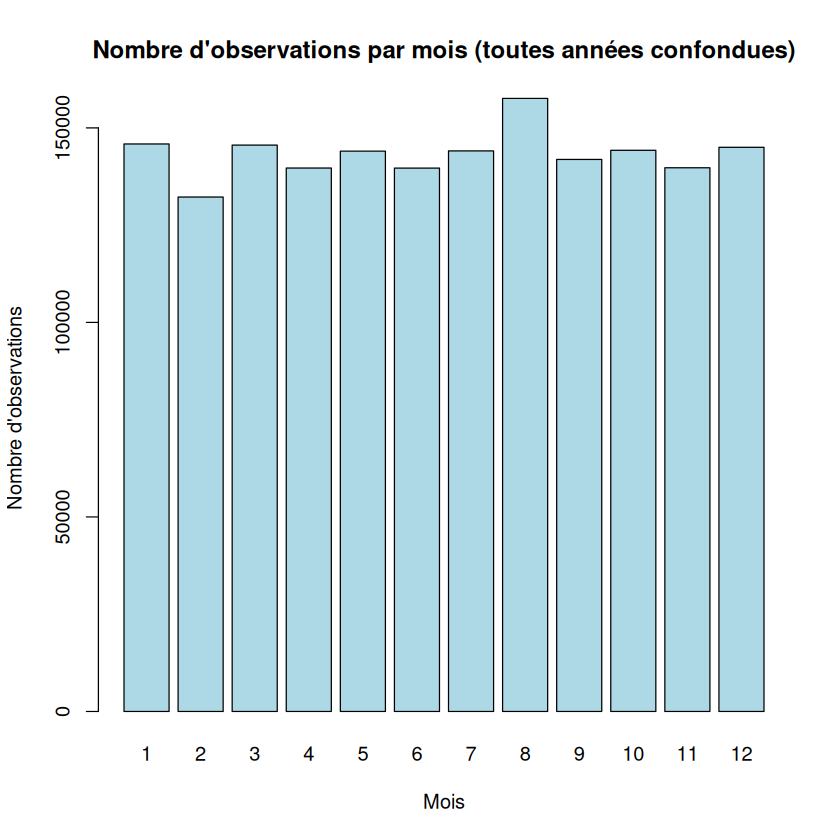

In [77]:
par(bg = "white")
barplot(table(mois),
        main = "Nombre d'observations par mois (toutes années confondues)",
        col = "lightblue",
        xlab = "Mois",
        ylab = "Nombre d'observations")

cat("Cette représentation montre que les données sont globalement bien réparties sur les mois.\n")

## Données géographiques

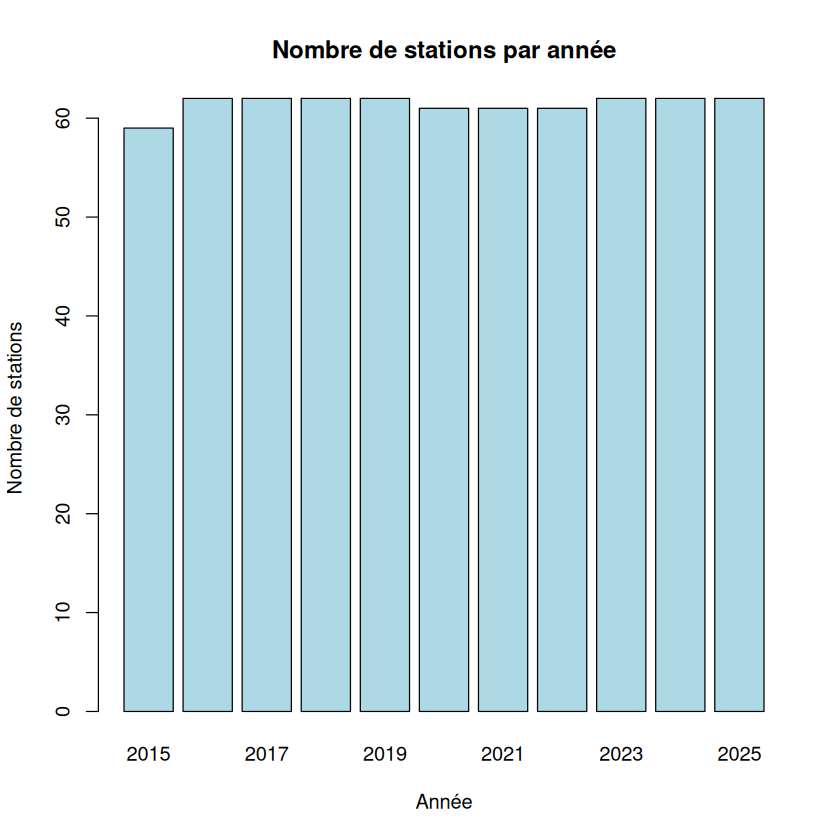

In [87]:
# Nombre de stations uniques par année
nb_stations <- tapply(data$ID.OMM.station, data$Annee, function(x) length(unique(x)))

par(bg = "white")
barplot(nb_stations,
        main = "Nombre de stations par année",
        col = "lightblue",
        xlab = "Année",
        ylab = "Nombre de stations")

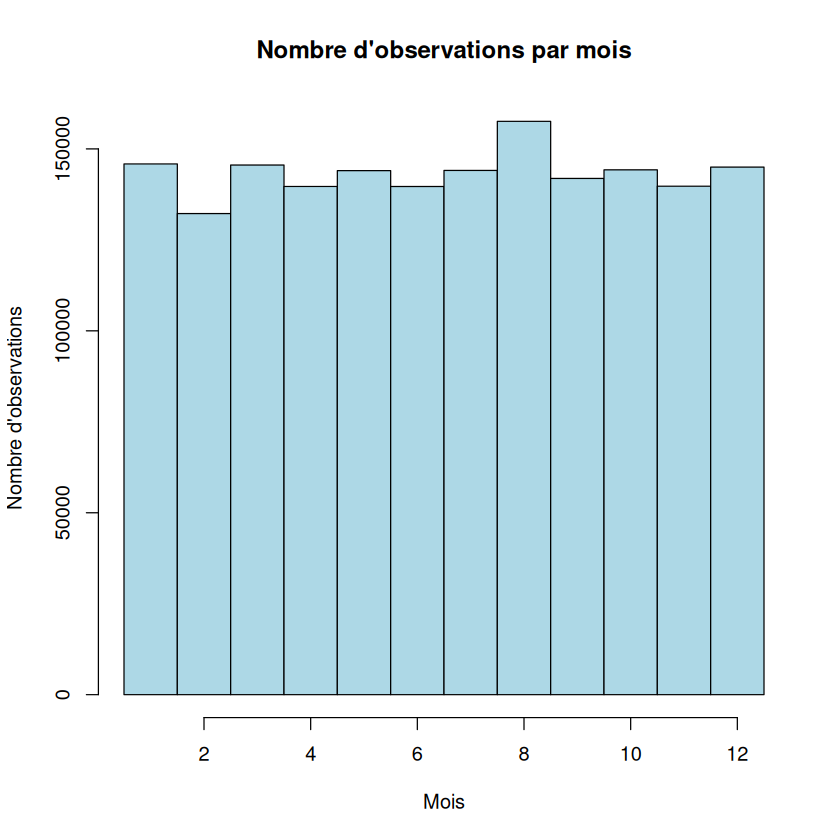

In [88]:
par(bg = "white")
hist(mois,
     breaks = seq(min(mois)-0.5, max(mois)+0.5, by = 1),
     col = "lightblue",
     main = "Nombre d'observations par mois",
     xlab = "Mois",
     ylab = "Nombre d'observations")

ℹ © Stadia Maps © Stamen Design © OpenMapTiles © OpenStreetMap contributors.



Warning message:
“Removed 20 rows containing missing values or values outside the scale range
(`geom_point()`).”


Il y a 20 stations a priori hors de france métropolitaine

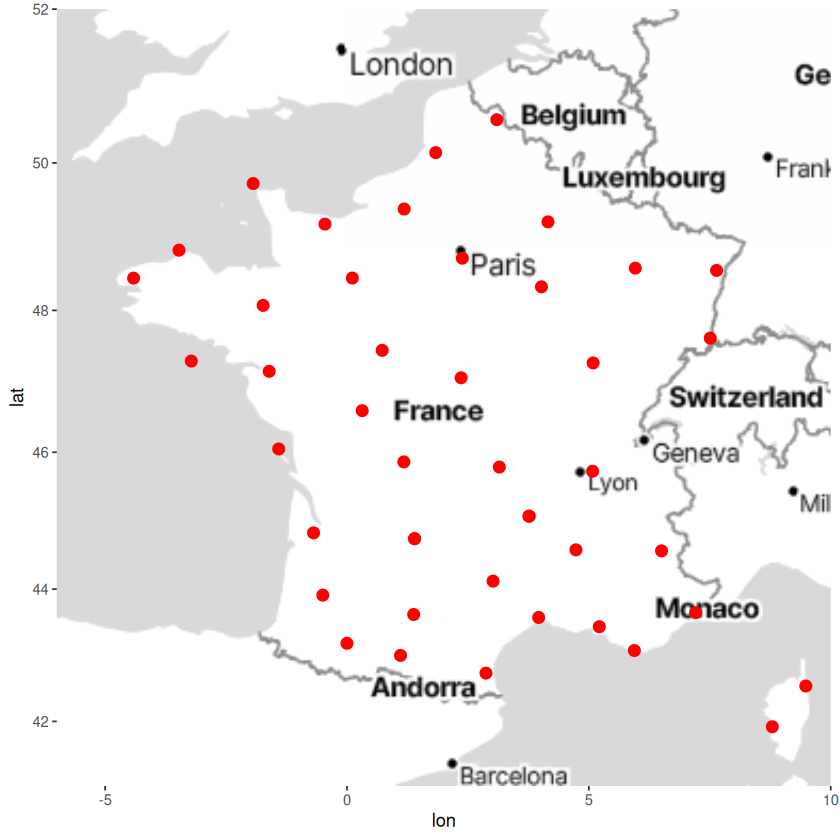

In [92]:
fr_bbox <- c(left = -6, bottom = 41, right = 10, top = 52)
map <- get_stadiamap(bbox = fr_bbox, zoom = 5, maptype = "stamen_toner_lite")

stations <- unique(data[, c("Longitude", "Latitude")])

ggmap(map) +
geom_point(
    data = stations,
    aes(x = Longitude, y = Latitude),
    color = "red",
    size = 3
  )

cat("Il y a 20 stations a priori hors de france métropolitaine")


## Qualité

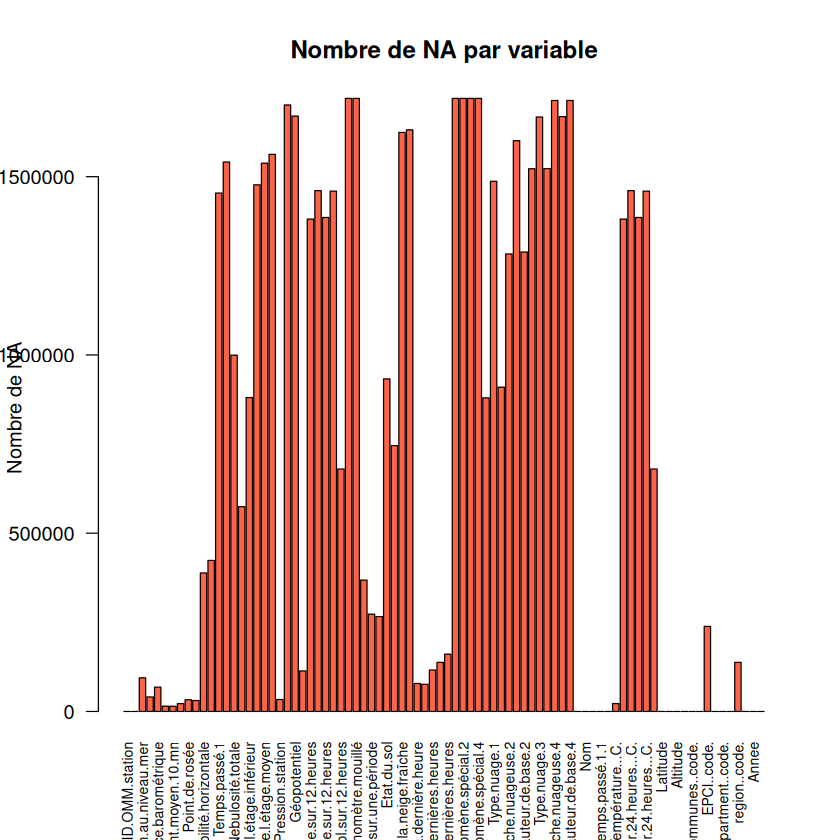

In [82]:
# Histogramme du nombre de valeurs manquantes (NA) par variable

par(bg = "white")
na_count <- sapply(data, function(x) sum(is.na(x)))
barplot(na_count,
        main = "Nombre de NA par variable",
        col = "tomato",
        las = 2,
        ylab = "Nombre de NA",
        cex.names = 0.7)

# Partie 2